Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package.

#### Contents
* introduction to topic modelling
* understanding gensim library
* Using Regular expressions 
* Data Preprocessing (removal of emails and new lines nd formats)
* Bag of words concept
* Exploratory Data Analysis for text data
* Understanding Bigram and Trigram 
* making LDA input and encoding of text data 
* creating LDA models 
* Selecting the number of topics 
* Model Evaluation


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
df = pd.read_json('newsgroups.json')
df

content  target  \
0      From: lerxst@wam.umd.edu (where's my thing)\nS...       7   
1      From: guykuo@carson.u.washington.edu (Guy Kuo)...       4   
2      From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4   
3      From: jgreen@amber (Joe Green)\nSubject: Re: W...       1   
4      From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14   
...                                                  ...     ...   
11309  From: jim.zisfein@factory.com (Jim Zisfein) \n...      13   
11310  From: ebodin@pearl.tufts.edu\nSubject: Screen ...       4   
11311  From: westes@netcom.com (Will Estes)\nSubject:...       3   
11312  From: steve@hcrlgw (Steven Collins)\nSubject: ...       1   
11313  From: gunning@cco.caltech.edu (Kevin J. Gunnin...       8   

                   target_names  
0                     rec.autos  
1         comp.sys.mac.hardware  
2         comp.sys.mac.hardware  
3                 comp.graphics  
4                     sci.space  
...                         ...  
11309                   sci.med  
11310     comp.sys.mac.hardware  
11311  comp.sys.ibm.pc.hardware  
11312             comp.graphics  
11313           rec.motorcycles  

[11314 rows x 3 columns]

In [3]:
data = df.content.values.tolist()
data

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

## Data Cleaning 
#### Removing the emails adresses
Replace :****
\S*@\S*\s?
by ''

Demo here

Some explanations :
\S* : match as many non-space characters you can
@ : then a @
\S* : then another sequence of non-space characters
\s? : And eventually a space, if there is one. Note that the '?' is needed to match an address at the end of the line. Because of the greediness of '?', if there is a space, it will always be matched.

﻿

In [5]:
# Remove Emails
import re
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data

["From: (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\n

In [6]:

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

In [7]:
data = pd.Series(data)

In [8]:
# lets do some preproc3essing and move on 
# here we are going to use regex for data cleaning
import re
data_processed = data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0        from where s my thing subject what car is this...
1        from guy kuo subject si clock poll final call ...
2        from thomas e willis subject pb questions orga...
3        from joe green subject re weitek p organizatio...
4        from jonathan mcdowell subject re shuttle laun...
                               ...                        
11309    from jim zisfein subject re migraines and scan...
11310    from subject screen death mac plus/ lines orga...
11311    from will estes subject mounting cpu cooler in...
11312    from steven collins subject re sphere from poi...
11313    from kevin j gunning subject stolen cbr rr org...
Length: 11314, dtype: object

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
# now lets deal with stopwords 
# using nltk stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
len(stop_words)



184

In [13]:
from nltk import word_tokenize

In [16]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))

In [17]:
data_final[0]

'thing car nntp posting host rac wam umd organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please mail thanks brought neighborhood lerxst'

## Lets do some EDa

In [19]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
# freq_dist.keys()

[('lines', 11832),
 ('organization', 11208),
 ('one', 9014),
 ('would', 8906),
 ('writes', 7840),
 ('article', 7434),
 ('people', 5976),
 ('like', 5855),
 ('university', 5583),
 ('posting', 5506),
 ('know', 5134),
 ('get', 4995),
 ('host', 4984),
 ('nntp', 4808),
 ('think', 4542),
 ('max', 4389),
 ('also', 4307),
 ('time', 4083),
 ('new', 3966),
 ('good', 3739)]

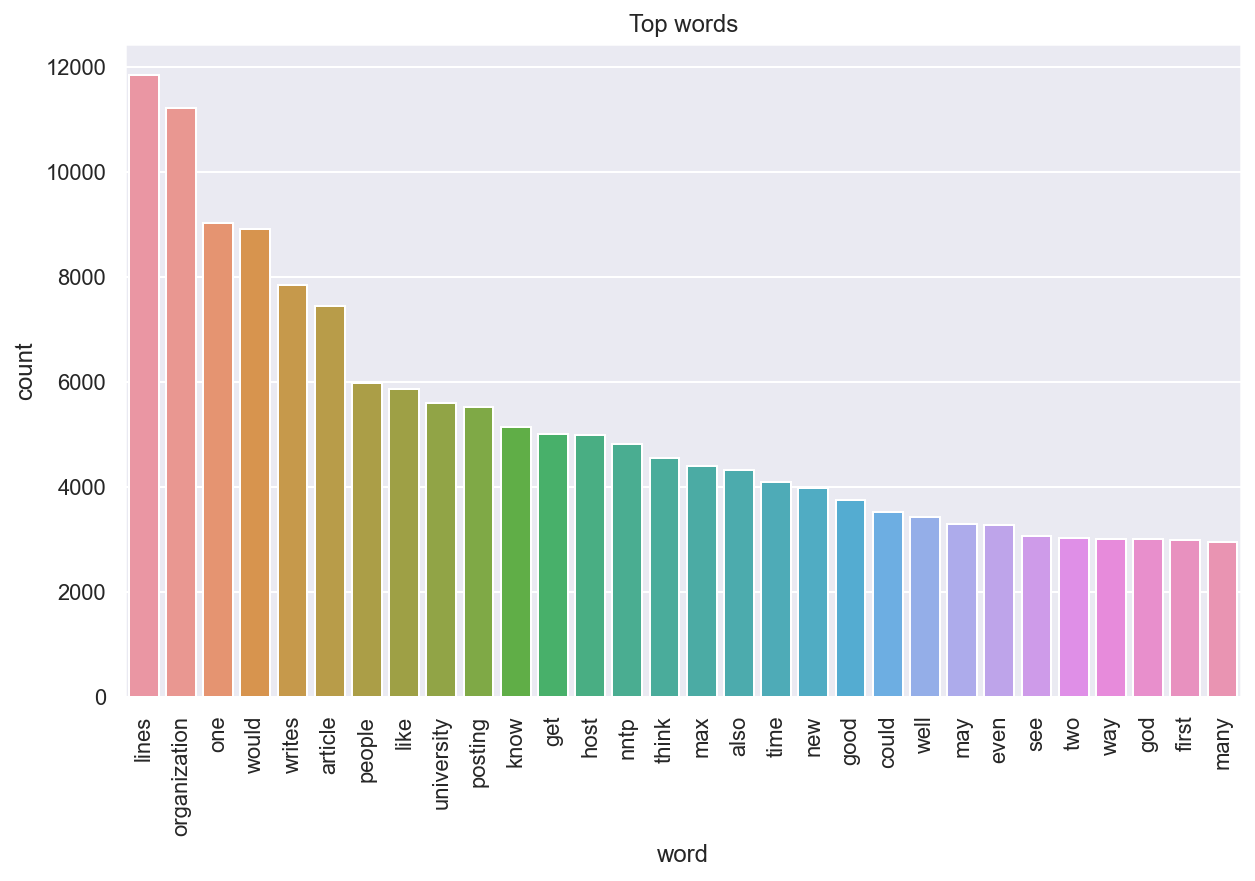

In [22]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

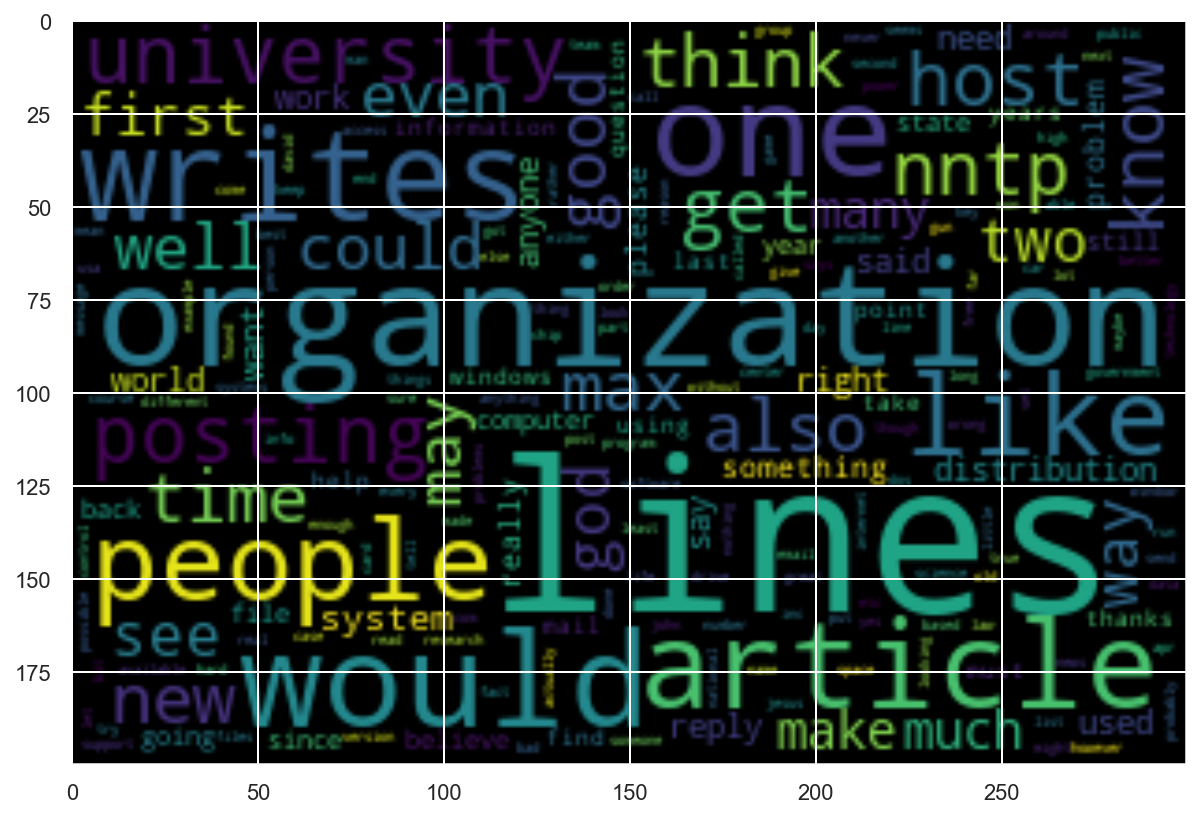

In [24]:
%config InlineBackend.figure_format = 'retina'

from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

# ## now lets create a Bigram and trigram for more sense

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

Some examples in our example are: ‘front_bumper’, ‘oil_leak’, ‘maryland_college_park’ etc.

Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.


In [27]:
#loading libraries 
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models


In [28]:
words_sent = [x.split() for x in data_final]
words_sent
bigram = Phrases(words_sent, min_count=5, threshold=100)
trigram = Phrases(bigram[words_sent], threshold=100)  

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# bow = [bigram_phraser[word] for word in words_sent] # creating bigram
bow = [trigram_phraser[bigram_phraser[word]] for word in words_sent] # creating trigram and bigrambb 

In [31]:
bow[0:1]

[['thing',
  'car',
  'nntp_posting_host',
  'rac_wam_umd',
  'organization',
  'university_maryland_college',
  'park',
  'lines',
  'wondering',
  'anyone',
  'could',
  'enlighten',
  'car',
  'saw',
  'day',
  'door',
  'sports_car',
  'looked',
  'late',
  'early',
  'called',
  'bricklin',
  'doors',
  'really',
  'small',
  'addition',
  'front_bumper',
  'separate',
  'rest',
  'body',
  'know',
  'anyone',
  'tellme',
  'model',
  'name',
  'engine',
  'specs',
  'years',
  'production',
  'car',
  'made',
  'history',
  'whatever',
  'info',
  'funky',
  'looking',
  'car',
  'please',
  'mail',
  'thanks',
  'brought',
  'neighborhood',
  'lerxst']]

In [42]:
### lemmatisation by using spacy and pos tagging
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # disabing the parse and ner from pipeline it increase speed of pipeline

# here 'en' in spacy pipeline means the small version of language

In [38]:
!python -m spacy download en_core_web_sm

2021-02-03 18:08:19.332054: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-02-03 18:08:19.332112: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
doc = nlp(' '.join(bow[0]))
for token in doc:
    print(token ,'=>', token.pos_)

thing => NOUN
car => NOUN
nntp_posting_host => PROPN
rac_wam_umd => ADJ
organization => NOUN
university_maryland_college => PROPN
park => NOUN
lines => NOUN
wondering => VERB
anyone => PRON
could => AUX
enlighten => VERB
car => NOUN
saw => VERB
day => NOUN
door => NOUN
sports_car => NUM
looked => VERB
late => ADV
early => ADV
called => VERB
bricklin => NOUN
doors => NOUN
really => ADV
small => ADJ
addition => NOUN
front_bumper => ADP
separate => ADJ
rest => NOUN
body => NOUN
know => VERB
anyone => PRON
tellme => VERB
model => NOUN
name => NOUN
engine => NOUN
specs => NOUN
years => NOUN
production => NOUN
car => NOUN
made => VERB
history => NOUN
whatever => DET
info => NOUN
funky => ADJ
looking => VERB
car => NOUN
please => INTJ
mail => NOUN
thanks => NOUN
brought => VERB
neighborhood => NOUN
lerxst => NOUN


In [43]:
# now lemmatising the whole corpus so that we can reach to the root words 
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']): # filter noun and adjective
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [44]:
bag_of_words = lemmatization(bow)


[['thing',
  'car',
  'rac_wam_umd',
  'organization',
  'university_maryland_college',
  'park',
  'line',
  'wonder',
  'enlighten',
  'car',
  'saw',
  'day',
  'door',
  'sports_car',
  'look',
  'late',
  'early',
  'call',
  'bricklin',
  'door',
  'really',
  'small',
  'addition',
  'separate',
  'rest',
  'body',
  'know',
  'tellme',
  'model',
  'name',
  'engine',
  'spec',
  'year',
  'production',
  'car',
  'make',
  'history',
  'info',
  'funky',
  'look',
  'car',
  'mail',
  'thank',
  'bring',
  'neighborhood',
  'lerxst'],
 ['clock',
  'poll',
  'final',
  'call',
  'summary',
  'final',
  'call',
  'clock',
  'report',
  'keyword',
  'acceleration',
  'clock',
  'upgrade',
  'article_shelley',
  'innc',
  'organization',
  'university',
  'washington',
  'line',
  'carson_washington',
  'fair',
  'number',
  'brave',
  'soul',
  'upgrade',
  'clock',
  'oscillator',
  'share',
  'experience',
  'poll',
  'send',
  'brief',
  'message',
  'detail',
  'experience',


In [46]:
bag_of_words[0]

['thing',
 'car',
 'rac_wam_umd',
 'organization',
 'university_maryland_college',
 'park',
 'line',
 'wonder',
 'enlighten',
 'car',
 'saw',
 'day',
 'door',
 'sports_car',
 'look',
 'late',
 'early',
 'call',
 'bricklin',
 'door',
 'really',
 'small',
 'addition',
 'separate',
 'rest',
 'body',
 'know',
 'tellme',
 'model',
 'name',
 'engine',
 'spec',
 'year',
 'production',
 'car',
 'make',
 'history',
 'info',
 'funky',
 'look',
 'car',
 'mail',
 'thank',
 'bring',
 'neighborhood',
 'lerxst']

## now we need to encode the whole corpus into some numbers 
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [48]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)
# here keys are some numbers and values are our words

Dictionary(74498 unique tokens: ['addition', 'body', 'bricklin', 'bring', 'call']...)


In [49]:
#  now lets create a encoded bag of words 
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]

In [50]:
corpus_matrix[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 4),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1)]

In [52]:
### Now create our model by using gensim lda

In [51]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=20, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [53]:

lda_model.print_topics()
# doc_lda = lda_model[corpus_matrix]

[(0,
  '0.056*"speak" + 0.044*"season" + 0.038*"steve" + 0.033*"mike" + 0.032*"trade" + 0.032*"scott" + 0.029*"chicago" + 0.029*"goal" + 0.027*"clearly" + 0.027*"boston"'),
 (1,
  '0.015*"include" + 0.015*"information" + 0.014*"also" + 0.014*"mail" + 0.013*"send" + 0.013*"new" + 0.012*"use" + 0.012*"system" + 0.011*"number" + 0.011*"list"'),
 (2,
  '0.087*"hell" + 0.062*"brain" + 0.057*"family" + 0.044*"gateway" + 0.030*"intel" + 0.028*"german" + 0.022*"bank" + 0.021*"corp" + 0.018*"meg" + 0.012*"simm"'),
 (3,
  '0.145*"god" + 0.070*"christian" + 0.047*"faith" + 0.047*"jesus" + 0.038*"bible" + 0.027*"religion" + 0.020*"believe" + 0.020*"man" + 0.020*"christianity" + 0.018*"christ"'),
 (4,
  '0.048*"cycle" + 0.036*"alan" + 0.020*"telescope" + 0.019*"thermal" + 0.017*"portable" + 0.012*"toyota" + 0.008*"walker" + 0.005*"steam" + 0.004*"guru" + 0.002*"nuclear_site_cooling_tower"'),
 (5,
  '0.109*"gun" + 0.040*"replace" + 0.033*"weapon" + 0.029*"firearm" + 0.028*"pull" + 0.024*"pro" + 0.02

### Visualisation of topic modelling

In [55]:
! pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=05eb557ea5120a483ee1693d90bb23a3b4b2874852433d65198c1c75461022e7
  Stored in directory: c:\users\abhishek\appdata\local\pip\cache\wheels\57\de\11\0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
Successfully built pyLDAvis


In [56]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.366940 -0.075935       1        1  33.043810
18     0.336047 -0.119360       2        1  15.686537
1      0.272205  0.171615       3        1  12.528183
13     0.251555  0.057019       4        1  11.820367
9      0.212416 -0.199715       5        1   8.783893
16     0.115572  0.286584       6        1   4.085387
7      0.037688  0.201516       7        1   3.141302
3      0.039224 -0.148318       8        1   1.725185
12    -0.029363 -0.028494       9        1   1.575119
10    -0.044223 -0.086305      10        1   1.354813
0     -0.124088  0.004331      11        1   1.016487
6     -0.115089  0.009711      12        1   1.000821
5     -0.130463 -0.005305      13        1   0.928612
19    -0.149118 -0.005707      14        1   0.911286
11    -0.134531 -0.029340      15        1   0.857600
15    -0.172436 -0.004034      16        1   0.466975
17    -0.173621 -0.004890      17        1   0.411958
2     -0.174049 -0.005094      18        1   0.374301
14    -0.188489 -0.008459      19        1   0.188182
4     -0.196177 -0.009820      20        1   0.099181, topic_info=               Term          Freq         Total Category  logprob  loglift
17             line  19798.000000  19798.000000  Default  30.0000  30.0000
24     organization  18162.000000  18162.000000  Default  29.0000  29.0000
217           write  14977.000000  14977.000000  Default  28.0000  28.0000
186         article  11446.000000  11446.000000  Default  27.0000  27.0000
617             god   3497.000000   3497.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
5300        jackson      0.015429      1.193748  Topic20 -11.4082   2.5674
1573          plant      0.086917    102.712025  Topic20  -9.6795  -0.1588
16742     gonorrhea      0.015429      1.193783  Topic20 -11.4082   2.5674
61592     influenza      0.015429      1.193783  Topic20 -11.4082   2.5674
1566        nuclear      0.015437    282.520288  Topic20 -11.4077  -2.8988

[911 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1604      1  0.563199     accept
1604      4  0.069810     accept
1604     10  0.366032     accept
3322     15  0.975286  accompany
1698     11  0.994899    acquire
...     ...       ...        ...
40        5  0.204806       year
40        9  0.130117       year
704       1  0.195344      young
704       5  0.755615      young
704       9  0.048299      young

[1265 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 19, 2, 14, 10, 17, 8, 4, 13, 11, 1, 7, 6, 20, 12, 16, 18, 3, 15, 5])

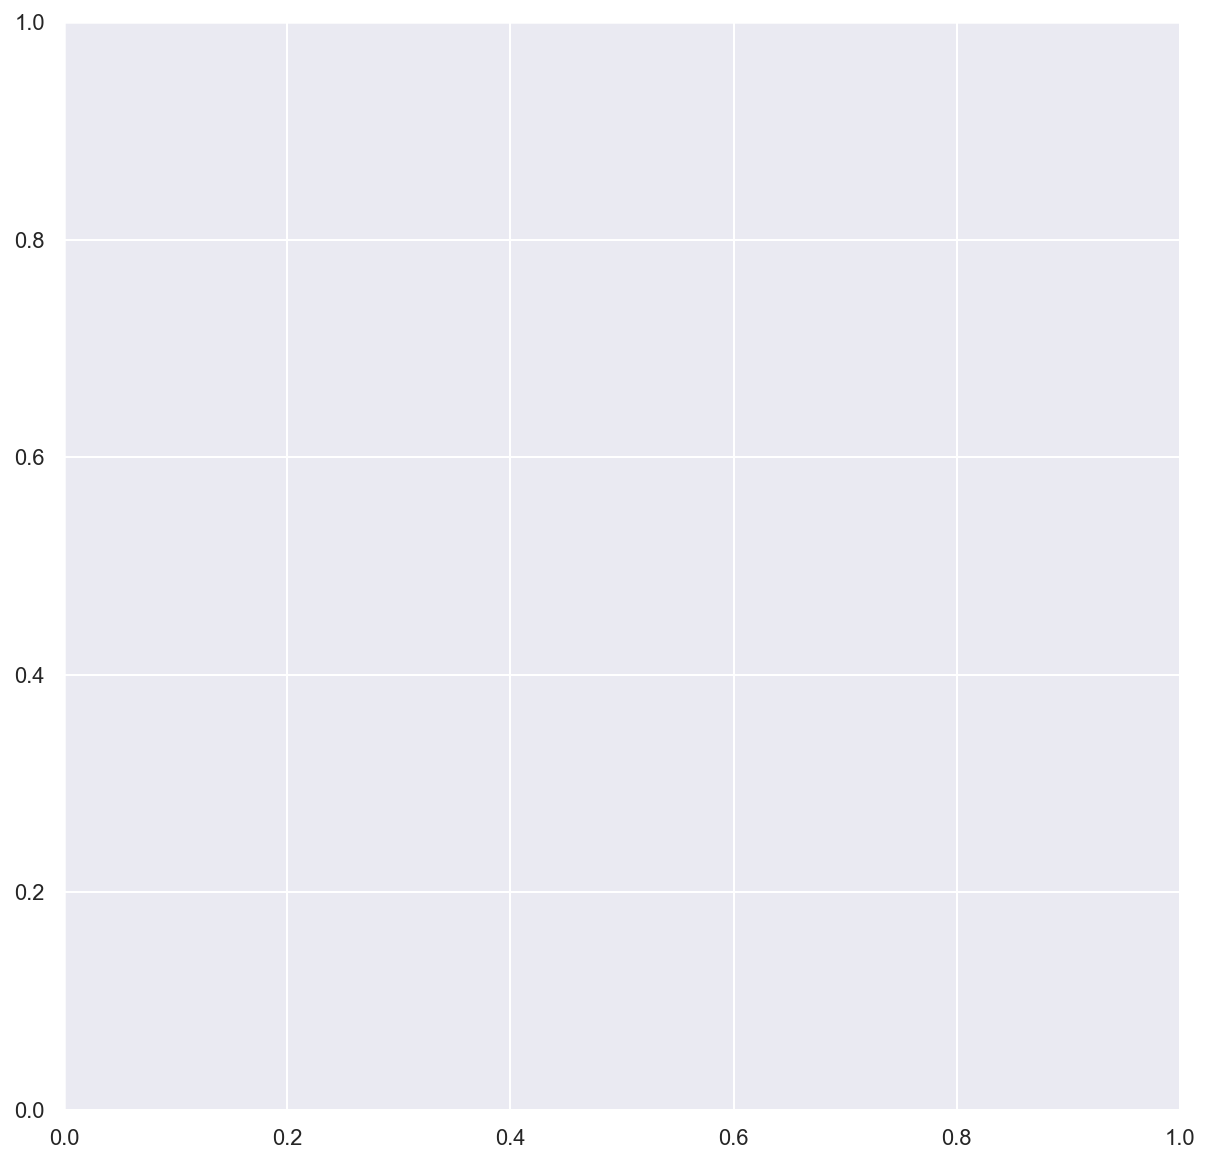

In [59]:
# Visualize the topics

# Visualize the topics
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = corpus_matrix, dictionary = id2word)
vis

#### Compute Model Perplexity and Coherence Score
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been

In [64]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -15.486457567370605

Coherence Score:  0.502489993483221


### Finding the number of topics 
Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [104]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [103]:
# it can take time so be patience
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_matrix, texts=bag_of_words, start=18, limit=40, step=6)


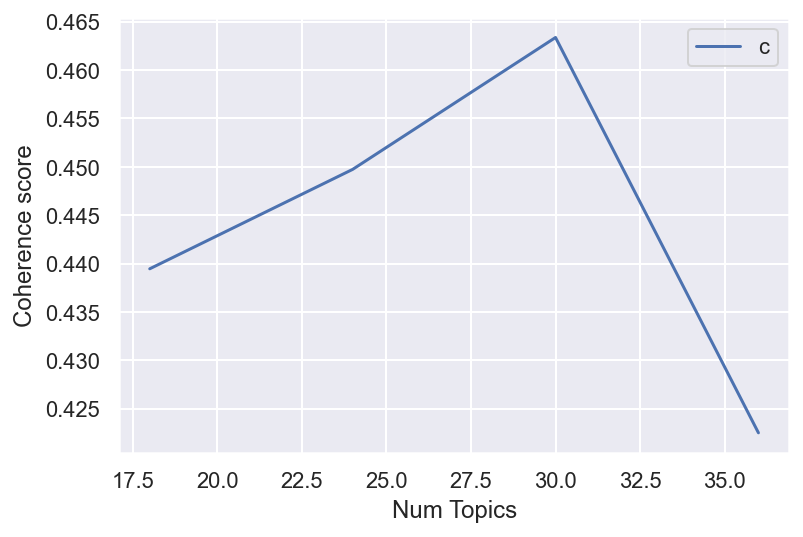

In [105]:
# Show graph
limit=40; start=18; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### from here we have got the best 30 topics to be selected in our data 

In [107]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=30, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [108]:
lda_model.print_topics()


[(19,
  '0.073*"blue" + 0.037*"jason" + 0.037*"ftp_site" + 0.029*"electrical" + 0.027*"camera" + 0.021*"unique" + 0.020*"scope" + 0.019*"atf" + 0.014*"lance" + 0.007*"clutch"'),
 (10,
  '0.195*"physical" + 0.076*"direct" + 0.035*"daughter" + 0.031*"adam" + 0.028*"human_being" + 0.021*"england" + 0.015*"semi" + 0.010*"department_computer_science" + 0.009*"genesis" + 0.007*"sister"'),
 (14,
  '0.108*"steve" + 0.089*"scott" + 0.082*"chicago" + 0.052*"boston" + 0.029*"buffalo" + 0.020*"label" + 0.014*"lemieux" + 0.010*"gretzky" + 0.008*"sabre" + 0.005*"precedent"'),
 (23,
  '0.141*"atheist" + 0.055*"atheism" + 0.053*"pro" + 0.051*"club" + 0.048*"pack" + 0.029*"origin" + 0.029*"soul" + 0.024*"univ" + 0.021*"eric" + 0.020*"july"'),
 (6,
  '0.131*"bike" + 0.049*"dod" + 0.047*"max" + 0.043*"rider" + 0.035*"m" + 0.033*"honda" + 0.025*"charle" + 0.022*"plot" + 0.022*"film" + 0.019*"atlanta"'),
 (24,
  '0.051*"armenian" + 0.047*"greek" + 0.033*"village" + 0.032*"muslim" + 0.028*"turk" + 0.025*"tu

In [109]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -18.78438774493046

Coherence Score:  0.4544857169723728
